# Imports

In [ ]:
import math
import sys
import textwrap

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from gprofiler import GProfiler

sys.path.append("scripts")

# GO Analysis

In [5]:
signatures = {
    "Neutrophil_cytotoxity": [
        "RNASE3",
        "MMP8",
        "BPI",
        "OLFM4",
        "MPO",
        "CAMP",
        "CRISP3",
        "DEFA4",
        "CEACAM8",
        "PRTN3",
        "ELANE",
        "LCN2",
        "LTF",
        "CTSG",
        "COL17A1",
        "RETN",
        "HTRA3",
        "DEFA1",
        "CHIT1",
        "CEACAM6",
        "AZU1",
        "DEFA3",
    ],
    "Complement": ["C1QA", "C1QB", "C1QC"],
    "Myeloid_Effector_Program": [
        "KIF13A",
        "ARG1",
        "P2RY13",
        "CKLF",
        "BCL6",
        "PFKFB4",
        "PROK2",
        "IL1R2",
        "CXCL1",
        "MCEMP1",
        "HSPA6",
        "GCA",
        "AMICA1",
        "GPR27",
        "OAZ2",
        "PGLYRP1",
        "CEBPB",
        "PDLIM7",
        "ACSL1",
        "ADGRG3",
        "CRISPLD2",
        "TREM1",
        "AQP9",
        "FPR1",
        "LTB4R",
        "FRAT2",
        "ZNF438",
        "TUBA1A",
        "TYROBP",
        "NFIL3",
        "PLIN5",
        "MSRB1",
        "PYGL",
        "FPR2",
        "DGAT2",
        "H3F3A",
        "MANSC1",
        "CD300A",
        "TALDO1",
        "DYNLT1",
        "NUP214",
        "CXCR1",
        "GNG10",
        "SAT1",
        "QPCT",
        "TBXAS1",
        "MNDA",
        "CCNJL",
        "PTAFR",
        "S100A12",
        "PLAUR",
        "RNF19B",
        "DUSP1",
        "FGR",
        "NFE2",
        "SLC22A4",
        "MRVI1",
        "HCK",
        "NCF4",
        "CEACAM3",
        "BST1",
        "ASPRV1",
        "LIMK2",
        "CLIC1",
        "RGS2",
        "TNFAIP6",
        "SLPI",
        "FRAT1",
        "TPD52L2",
        "NCF2",
        "GLT1D1",
        "FAM214B",
        "MARC1",
        "RNF149",
        "ALOX5AP",
        "MMP25",
        "SRGN",
        "FFAR2",
        "GLIPR2",
        "C19orf38",
        "BASP1",
        "RTN3",
        "IL10RB",
        "CSF3R",
        "CLEC4D",
        "BMX",
        "PHC2",
        "LILRA2",
        "NINJ1",
        "SLC25A44",
        "HSPA1A",
        "KREMEN1",
        "CKAP4",
        "ALPL",
        "CLEC4E",
        "C5AR1",
        "NADK",
        "LRG1",
        "DNTTIP1",
        "LY96",
        "CA4",
        "IFITM2",
        "HCAR2",
        "S100A8",
        "CDKN2D",
        "RHOG",
        "SIGLEC5",
        "SECTM1",
        "S100A9",
        "LRRC25",
        "BCL2A1",
        "ADM",
        "ANXA3",
        "ALOX5",
        "APOBEC3A",
        "PLEKHO2",
        "FTH1",
        "MMP9",
        "HCAR3",
        "PILRA",
        "TSEN34",
        "IFNGR2",
        "APMAP",
        "ARL11",
        "NPL",
        "PPP1R3B",
        "IL1RN",
        "SPI1",
        "SERPINA1",
        "PADI4",
        "PADI2",
        "ARRB2",
        "IL1B",
        "MGAM",
        "NFAM1",
        "CYSTM1",
        "DOK3",
        "NRBF2",
        "SIRPA",
        "HLX",
    ],
    "CXCL1/CXCL8": ["CXCL1", "CXCL8", "H3F3A", "MAP3K7CL", "RGS2", "RNF11"],
    "Acute_Innate_Inflammation": [
        "AGTRAP",
        "C19orf38",
        "CD14",
        "LILRA5",
        "MCEMP1",
        "QSOX1",
        "RAB32",
        "RBP7",
        "S100A12",
        "S100A6",
        "S100A8",
        "S100A9",
        "TYROBP",
    ],
    "IFN-Driven_Myeloid_Inflammation": [
        "IL1B",
        "TRIM21",
        "SECTM1",
        "APOBEC3A",
        "ANKRD22",
        "PARP9",
        "ZNF438",
        "TNFSF10",
        "TNFAIP6",
        "S100A8",
        "SERPING1",
        "CASP1",
        "BCL2A1",
        "IFIT1",
        "CARD16",
        "NMI",
        "TRAFD1",
        "ADM",
        "BATF2",
        "LIPM",
        "DHRS9",
        "IFIT2",
        "FCGR1A",
        "FCGR1B",
        "FFAR2",
        "SQRDL",
        "AIM2",
        "CLIC1",
        "IFIT3",
        "DYNLT1",
        "IL1RN",
    ],
}

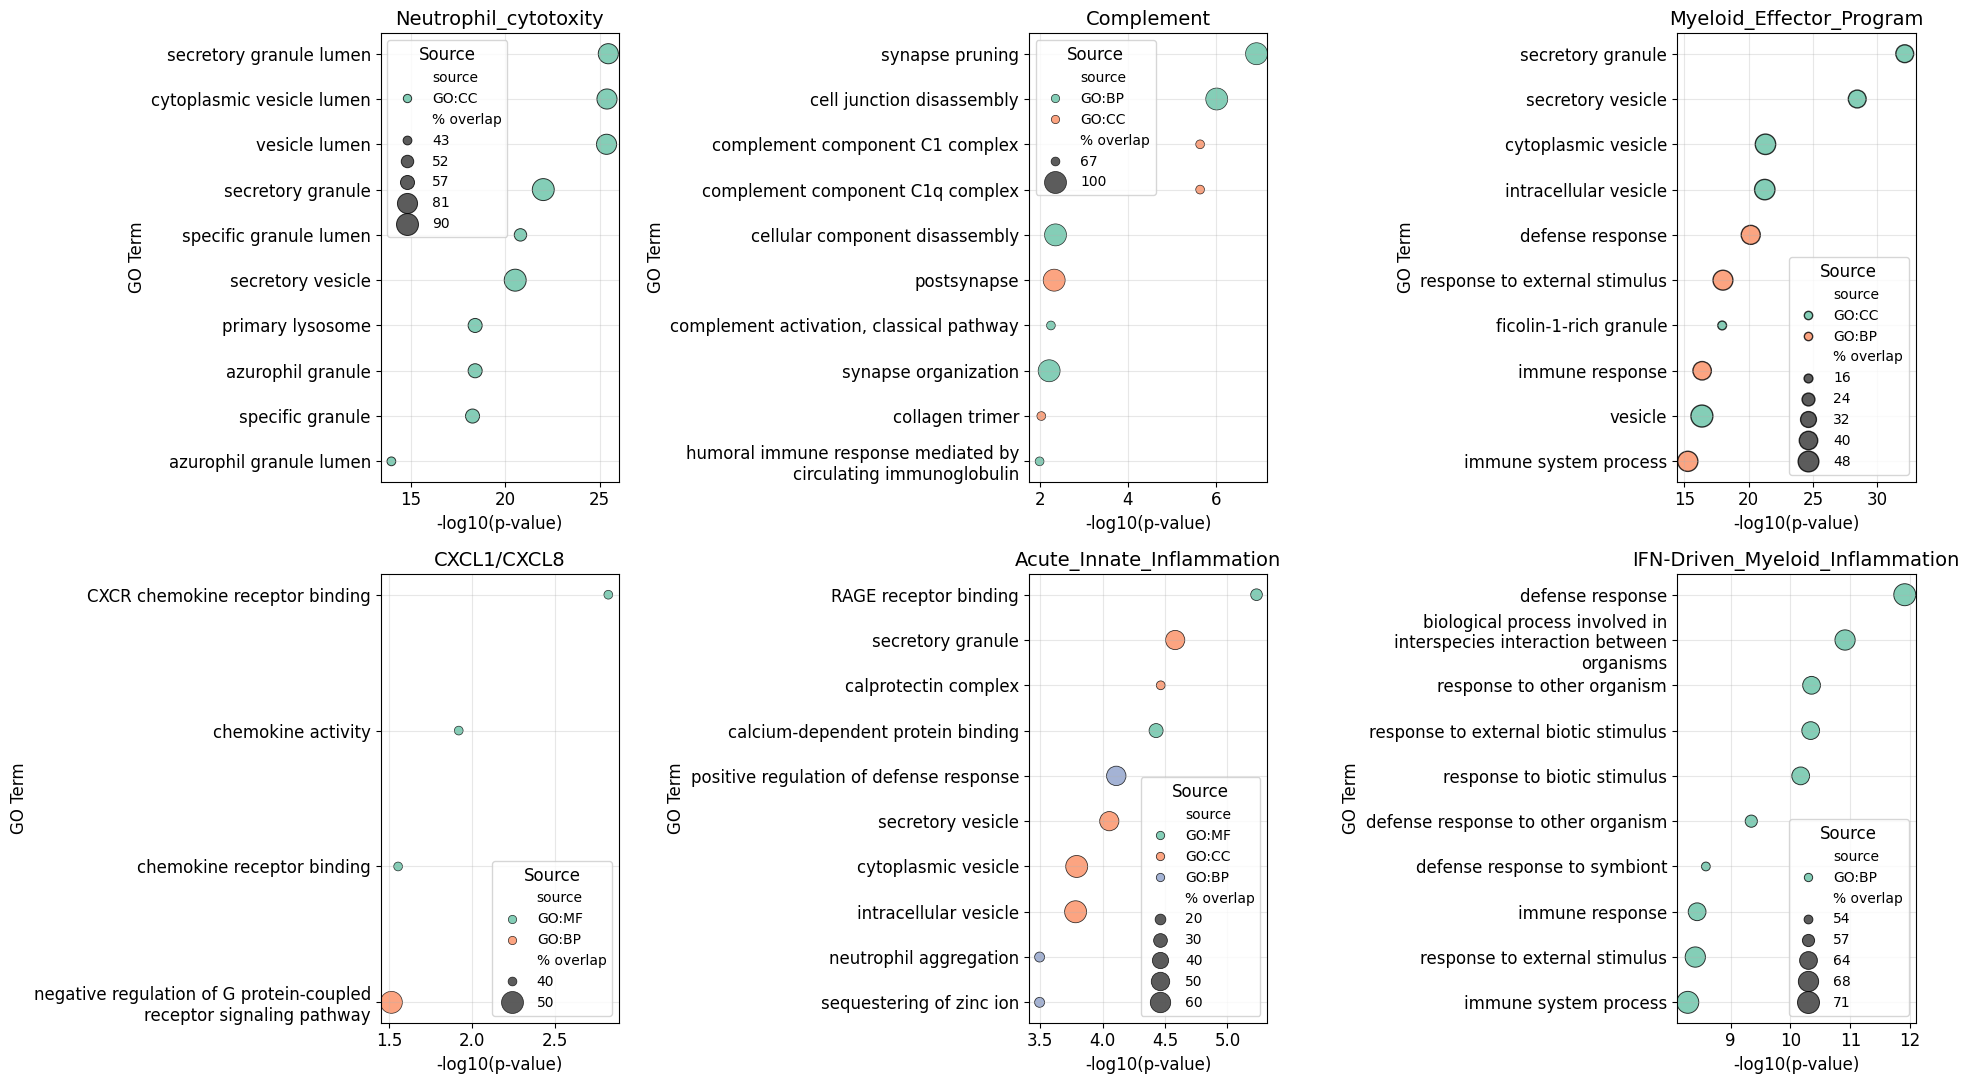

In [ ]:
gp = GProfiler(return_dataframe=True)

plt.rcParams.update({"font.size": 12})

cols = 3
num_sigs = len(signatures)
rows = math.ceil(num_sigs / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.5, rows * 5.5))
axes = axes.flatten()

for i, (sig_name, gene_list) in enumerate(signatures.items()):
    res = gp.profile(
        organism="hsapiens", query=gene_list, sources=["GO:BP", "GO:MF", "GO:CC"]
    )
    res = res[res["p_value"] < 0.05]

    if res.empty:
        print(f"⚠️ Нет значимых GO-терминов для сигнатуры {sig_name}")
        axes[i].axis("off")
        continue

    res["-log10(p_value)"] = -np.log10(res["p_value"])
    res["% overlap"] = (
        (res["intersection_size"] / res["query_size"] * 100).round().astype(int)
    )

    res["name_wrapped"] = res["name"].apply(lambda x: textwrap.fill(x, width=40))

    top_terms = res.sort_values("p_value").head(10)

    sns.scatterplot(
        data=top_terms,
        x="-log10(p_value)",
        y="name_wrapped",
        size="% overlap",
        hue="source",
        palette="Set2",
        sizes=(40, 250),
        alpha=0.8,
        edgecolor="black",
        ax=axes[i],
    )

    axes[i].set_title(f"{sig_name}", fontsize=14)
    axes[i].set_xlabel("-log10(p-value)", fontsize=12)
    axes[i].set_ylabel("GO Term", fontsize=12)
    axes[i].grid(alpha=0.3)
    axes[i].legend(title="Source", loc="best", fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("../images/go_enrichment.png", dpi=300, bbox_inches="tight")
plt.show()